In [1]:
import sys, os
BIN = os.path.expanduser("../../../")
sys.path.append(BIN)
from scipy.constants import c

import numpy as np
import matplotlib.pyplot as plt

In [2]:
from PyHEADTAIL_feedback.signal_tools.response_tools import frequency_response, impulse_response, signal_response
from PyHEADTAIL_feedback.signal_tools.plotters import plot_frequency_responses
# , plot_impulse_response

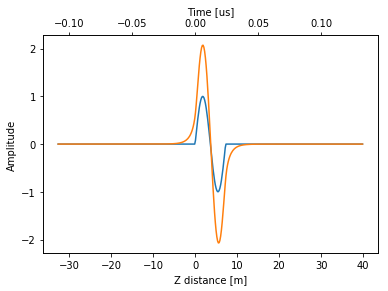

In [3]:
from PyHEADTAIL_feedback.processors.convolution import Lowpass, Highpass
from PyHEADTAIL_feedback.processors.convolution import PhaseLinearizedLowpass, Gaussian, Sinc
f_c = 33e6

processors_1 = [PhaseLinearizedLowpass(f_c)]
t, z, input_signal, output_signal = impulse_response(processors_1, (-4./f_c, 4./f_c), n_points=401,
                                           impulse_type = 'bipolar_sine')

fig, ax1 = plt.subplots()
ax2 = ax1.twiny()
ax1.plot(z,input_signal)
ax1.plot(z,output_signal)

ax2.plot(t*1e6, np.zeros(len(t)))
ax2.cla()

ax1.set_xlabel('Z distance [m]')
ax1.set_ylabel('Amplitude')
ax2.set_xlabel('Time [us]')
plt.show()

# print t
# print z
# print impulse
# print response

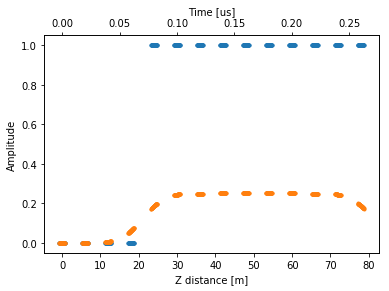

In [4]:
from PyHEADTAIL_feedback.signal_tools.signal_generators import SimpleBeam
f_c = 10e6
n_slices = 40
intensity = 1e11
n_bunches = 14
bunch_spacing = 20e-9
bunch_length = 5e-9
simple_beam = SimpleBeam(n_bunches, bunch_spacing, bunch_length, intensity, n_slices)
temp_x = simple_beam.x
temp_x[simple_beam.z>20.] += 1.
# temp_x[simple_beam.z>40.] -= 1.
simple_beam.x = temp_x

processors = [Gaussian(f_c)]
t, z, input_signal, output_signal = signal_response(simple_beam, processors)
fig, ax1 = plt.subplots()
ax2 = ax1.twiny()
ax1.plot(z,input_signal,'.')
ax1.plot(z,output_signal,'.')

ax2.plot(t*1e6, np.zeros(len(t)))
ax2.cla()

ax1.set_xlabel('Z distance [m]')
ax1.set_ylabel('Amplitude')
ax2.set_xlabel('Time [us]')
plt.show()


In [5]:
# from PyHEADTAIL_feedback.processors.harmonic_convolution import Lowpass, Highpass
# from PyHEADTAIL_feedback.processors.harmonic_convolution import PhaseLinearizedLowpass, GaussianLowpass, Sinc

# f_c = 33e6

# processors_1 = [Lowpass(f_c)]
# f_1, amp_1, phase_1 = frequency_response(processors_1, 1./f_c, resp_symmetry='delayed', n_f_points = 26)
# processors_2 = [GaussianLowpass(f_c)]
# f_2, amp_2, phase_2 = frequency_response(processors_2, 1./f_c)
# processors_3 = [Sinc(f_c)]
# f_3, amp_3, phase_3 = frequency_response(processors_3, 1./f_c)

In [6]:
# data = []
# data.append([f_1, amp_1, phase_1])
# data.append([f_2, amp_2, phase_2])
# data.append([f_3, amp_3, phase_3])
# labels = ['Lowpass', 'Gaussian', 'Sinc']
# plot_frequency_responses(data,labels, f_c)

In [7]:
from PyHEADTAIL_feedback.processors.convolution import Lowpass, Highpass
from PyHEADTAIL_feedback.processors.convolution import PhaseLinearizedLowpass, Gaussian, Sinc

f_c = 100e6

processors_1 = [Lowpass(f_c)]
f_1, amp_1, phase_1 = frequency_response(processors_1, 1./f_c, resp_symmetry='delayed')
print 'Lowpass done'
processors_2 = [Gaussian(f_c)]
f_2, amp_2, phase_2 = frequency_response(processors_2, 1./f_c)
print 'Gaussian done'


Lowpass done
Gaussian done


In [8]:
processors_3 = [Sinc(f_c, normalization='sum')]
f_3, amp_3, phase_3 = frequency_response(processors_3, 1./f_c)
print 'Sinc done'

Sinc done


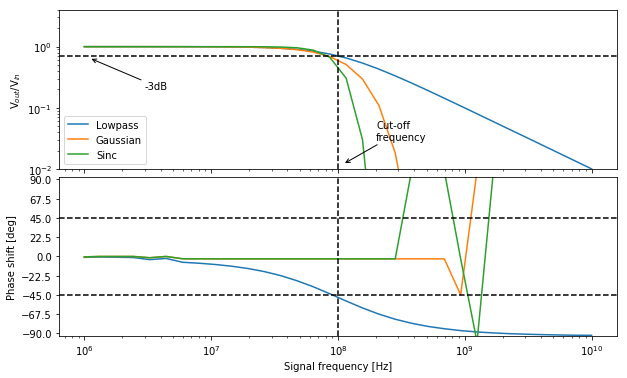

(<matplotlib.figure.Figure at 0x7f5cb494bb10>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5cb5533f10>)

In [9]:
data = []
data.append([f_1, amp_1, phase_1])
data.append([f_2, amp_2, phase_2])
data.append([f_3, amp_3, phase_3])
labels = ['Lowpass', 'Gaussian', 'Sinc']
plot_frequency_responses(data,labels, f_c)